## Reference

[1.] [【爬蟲】從Dcard網站看爬蟲入門](https://medium.com/pyladies-taiwan/%E5%BE%9Edcard%E7%B6%B2%E7%AB%99%E7%9C%8B%E7%88%AC%E8%9F%B2%E5%85%A5%E9%96%80-65105f0ddac)


***

# 「查看目前Dcard十大熱門文章標題」

***

## 取得資料

### 擷取網站資訊

 - 在我們進入目標網頁時，我們其實是對著伺服器送出「請求」，而使用網址就是利用get這種請求，如果想了解更深入的網路請求可見 [HTTP Methods](https://zh.wikipedia.org/wiki/%E8%B6%85%E6%96%87%E6%9C%AC%E4%BC%A0%E8%BE%93%E5%8D%8F%E8%AE%AE)。
 
 
### 如何透過程式取得網頁資訊
 - 在requests套件中，有一個requests.get(目標網址)的方法，我們可以宣告一個變數，存放我們取得的網頁資訊。
 - 我們宣告 url 此變數存放我們的目標網址，而我們要透過requests發送網路請求。
```res = requests.get(url)``` 透過 res 這個變數存放我們利用 get 取得的資訊。


### 如何查看我們是否有成功取得網頁的資訊
 - 我們可以印出 ```resp.status_code``` 取得網頁的狀態碼，來得知此網頁是否有成功收到請求，並且是否為正常狀態。
 - 常見的狀態碼：200表示正常、404表示找不到網頁等…可見HTTP狀態碼。


### 過濾字元與分析網頁程式碼 - 開啟開發人員工具之快捷鍵
 - Windows 與 Linux － Ctrl + Shift + I 鍵或 F12 鍵
 - Mac-命令（⌘）+ Option + I鍵
 
### 從原始碼當中想要取得「標題」

 - 可以透過 ```BeautifulSoup``` 套件去解構網頁內容，網頁內容大致可以分成 **HTML** 語法、**CSS** 網頁樣式以及 **javascript** 這三類。 
 
### 簡介HTML的語法
在每一個網頁中，都會透過 ```<tag>```，表示各式各樣的標籤組成，當我們要取得所需的網頁區塊資料(如內文、標題、圖片等…)，可以利用標籤( ```<title>, <h1>, <p>, <a>…)```以及 ```屬性(alt、class、href…)``` 去定位，使得程式可以取得資料。 

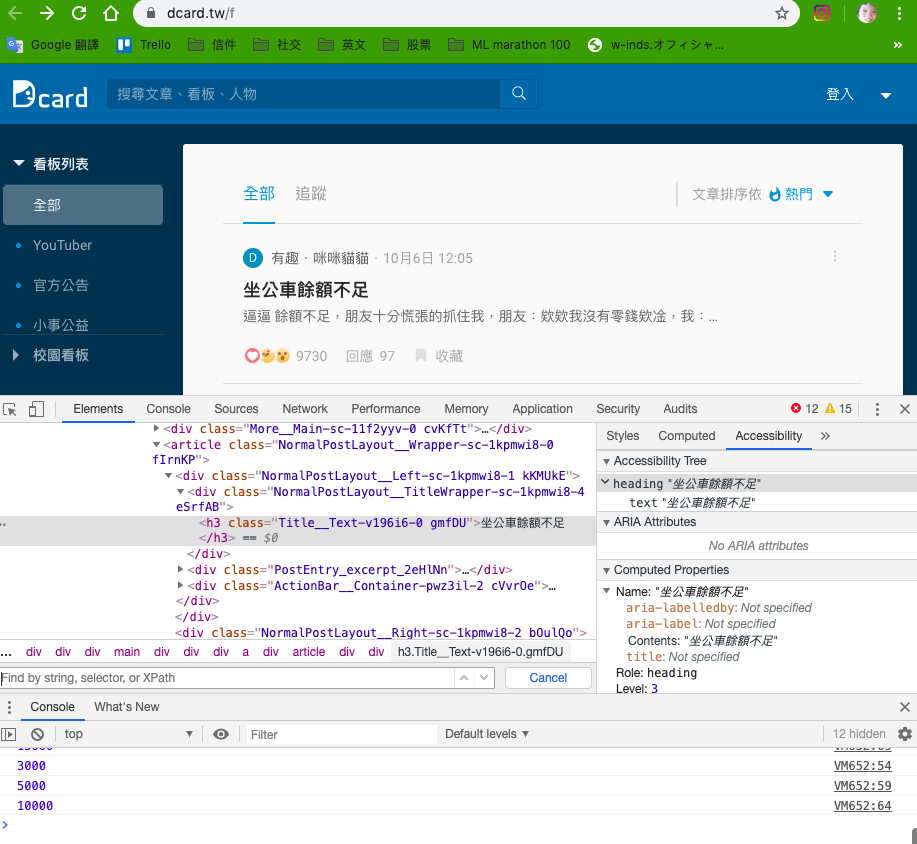

In [3]:
%matplotlib inline
from PIL import Image
Image.open("./dataset/web_network.png")

#### 可以看到該 Title
```
<h3 class="Title__Text-v196i6-0 gmfDU">坐公車餘額不足</h3>
```

若要提取 “坐公車餘額不足” 該如何提取？
 - ```BeautifulSoup``` 的 ```find_all()```
 - ```find(), find_all()``` 是利用 HTML 中的 **標籤名稱** 以及**屬性** 去定位/找到資料區塊
   - ```find()```回傳第一個區塊
   - ```find_all()```會回傳一個 **list**
   
   
***

```find_all()``` 要求回傳的參數如下：

```find_all（name，attrs，recursive，string，limit，** kwargs）```

 - (1) name是標籤名稱 例如<a href=””></a>的name就是a
 - (2) attrs是直接用字典型態去匹配各種屬性
 - (3) recursive是否「遞迴處理」子屬性(True or False)

 - ```Beautiful Soup```會查詢目前 ```tag``` 的父子節點
 - 如果只想要搜詢 tag 的"直接子節點",參數可以使用```recursive = False```
 
 
```<html> 
<head> 
  <title> 
   Dcard 主頁
  </ title> 
</ head> 
...
```

 - (4) string則是找文字部分
 - (5) ```**XXkwargs``` 則是表示接受 **字典型態** 的可變參數
     - 如果一個指定名字的參數不是搜索內置的參數名，搜索時會把該參數當作指定名字標籤的屬性來搜索

***
如果包含一個名字為```id```的參數，Beautiful Soup會搜索每個標籤的「id」屬性

```soup.find_all（id ='link2'）```

```> [<a class="sister" href="http://example.com/lacie" id="link2"> apple </a>]```

***

如果傳入```href```參數，Beautiful Soup會搜索每個標籤的「href」屬性：

```soup.find_all（href = re.compile（“elsie”））```

```> [<a class="sister" href="http://example.com/elsie" id="link1"> cat </a>]```


***

當我們使用```soup.find_all('a','apple')```
 - 其語法所代表的是要搜尋標籤名稱為 a, 屬性 class 為 apple 的結果，會發現無任何匹配, 因為 apple 不等於 apple1 或 apple2
 - 所以要利用re.compile，原因如下：
 
```compile(pattern, flags=0)```

```re.compile``` 用來將正則表達式轉換爲一個「pattern object」（模式對象）。將**正則表達式**轉換爲模式對象的作用就是可以將其保存下來，已備後續之用。

***

 - 截錄目標中的網頁原始碼，代表標籤的名稱為h3
 - 有屬性 class、Title__Text
 - 「Title__Text」為屬性 class 
 - -v196i6-0 gmfDU的值 (value)
 - 此例之中，find_all()的參數為：

```
name = <h3>
attrs = re.compile（'Title__Text'）
```   

其中檢視原始碼之後，可以發現每一個標題都被<h3>此標籤包起來，以及其class都是開頭「PostEntry_title」，因此我們透過BeautifulSoup該套件中的findall()函式與re套件中的正則表達式去比對、過濾該行，透過矩陣將他輸出於螢幕中。

In [10]:
import requests 
from bs4 import BeautifulSoup
import re

url = 'https://www.dcard.tw/f'

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko)'}

res = requests.get(url, headers = headers)

In [13]:
soup = BeautifulSoup(res.text, 'html.parser')

In [55]:
dcard_title = soup.find_all('h3', re.compile('Title__Text'))

In [83]:
dcard_title

[<h3 class="Title__Text-v196i6-0 gmfDU">坐公車餘額不足</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">你要先聽好消息還是壞消息？</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">我家貓咪好像越來越大了</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">(更)懶人維持身材法</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">德國男友給我最狂的約會</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">日常寬鬆穿搭（更 感謝各位</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">因為你的求婚，我們吵架了</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">被襲胸了啦快報警</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">到底台灣哪裡對不起吳宗憲？</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">兔女狼結婚了🎉🎉🎉</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">更/真的不必跟男朋友的朋友當朋友</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">上大學後的頭髮</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">女友喜歡被我罵(微西斯)</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">到底誰才是妳男友</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">一起給中國國慶祝福吧</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">關於臉上有痣的那位女星</h3>,
 <h3 class="Title__Text-v196i6-0 gmfDU">時隔三年再次出現在偶像面前，偶像會？</h3>,
 <h3 class="

In [87]:
dcard_title.string # 因為是 list 所以產生錯誤

AttributeError: ResultSet object has no attribute 'string'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [86]:
dcard_title[1].string

'你要先聽好消息還是壞消息？'

In [81]:
print("Dcard 熱門文章標題：")
for i in range(len(dcard_title)):
    print( "\t" + str(i+1) + ": " + dcard_title[i].string)

Dcard 熱門文章標題：
	1: 坐公車餘額不足
	2: 你要先聽好消息還是壞消息？
	3: 我家貓咪好像越來越大了
	4: (更)懶人維持身材法
	5: 德國男友給我最狂的約會
	6: 日常寬鬆穿搭（更 感謝各位
	7: 因為你的求婚，我們吵架了
	8: 被襲胸了啦快報警
	9: 到底台灣哪裡對不起吳宗憲？
	10: 兔女狼結婚了🎉🎉🎉
	11: 更/真的不必跟男朋友的朋友當朋友
	12: 上大學後的頭髮
	13: 女友喜歡被我罵(微西斯)
	14: 到底誰才是妳男友
	15: 一起給中國國慶祝福吧
	16: 關於臉上有痣的那位女星
	17: 時隔三年再次出現在偶像面前，偶像會？
	18: 一句話讓留學生火
	19: 男友在我拔牙的時候問我要不要口交🤬
	20: 遏止彩虹版歪風：教你如何寫出讀者喜愛的文章
	21: 日常穿衣服分享
	22: 讓我們期待今年最後一次連假吧
	23: 未婚夫全家都不喜歡我
	24: Mamamoo最新不朽舞台
	25: 超級渣男
	26: 如何化出透明感的妝容
	27: 作为一个大陆人想说的
	28: 在高中時的殘障廁所聽到別人在愛愛(微西斯
	29: 輸給沒自信的自己
	30: 超級矮妹@me 在韓國讀書的穿搭/非本科生 純分享 沒有在開班授課😆
